In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import warnings
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [2]:
# suppressing warning messages
warnings.filterwarnings('ignore')

In [3]:
# Importing some scripts

from scripts.data_visualization import Data_Viz 
from scripts.data_cleaning import DataCleaner

DC = DataCleaner('../logs/data_clean_notebook.log')
DV = Data_Viz('../logs/data_clean_notebook.log')

In [4]:
#loading data sets
sample_data = pd.read_csv('../data/sample_submission.csv')
store_data = pd.read_csv('../data/store.csv')
test_data = pd.read_csv('../data/test.csv')
train_data = pd.read_csv('../data/train.csv')

In [5]:
#exploring the sample dataset
print(f"There sample dataset has - {sample_data.columns.to_list()} columns and, \n{sample_data.shape} shape")
sample_data.head(3)

There sample dataset has - ['Id', 'Sales'] columns and, 
(41088, 2) shape


,Id,Sales
0,1,0
1,2,0
2,3,0


In [6]:
# explaoring the store dataset

print(f'The store data has - {store_data.columns.tolist()} columns and, \n{store_data.shape} shape')
store_data.head(3)


The store data has - ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'] columns and, 
(1115, 10) shape


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [7]:
#exploring the test dataset
print(f"The test dataset has - {test_data.columns.tolist()} columns and, \n {test_data.shape} shape")
test_data.head(3)

The test dataset has - ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday'] columns and, 
 (41088, 8) shape


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0


In [8]:
#exploring train dataset
print(f"The train dataset has - {train_data.columns.to_list()} columns and,\n{train_data.shape} shape")
train_data.head(3)

The train dataset has - ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday'] columns and,
(1017209, 9) shape


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


Checking for missing values

In [9]:
#looking for missing values in sample dataset
sample_data.isnull().sum()



Id       0
Sales    0
dtype: int64

In [10]:
DV.summ_columns(sample_data)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Id,0,0.0,int64,41088
1,Sales,0,0.0,int64,1


In [11]:
#looking for missing values in store dataset
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [12]:
DV.summ_columns(store_data)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Store,0,0.0,int64,1115
1,StoreType,0,0.0,object,4
2,Assortment,0,0.0,object,3
3,CompetitionDistance,3,0.0,float64,655
4,CompetitionOpenSinceMonth,354,32.0,float64,13
5,CompetitionOpenSinceYear,354,32.0,float64,24
6,Promo2,0,0.0,int64,2
7,Promo2SinceWeek,544,49.0,float64,25
8,Promo2SinceYear,544,49.0,float64,8
9,PromoInterval,544,49.0,object,4


In [13]:
#looking for missing values in test dataset
test_data.isnull().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [14]:
DV.summ_columns(test_data)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Id,0,0.0,int64,41088
1,Store,0,0.0,int64,856
2,DayOfWeek,0,0.0,int64,7
3,Date,0,0.0,object,48
4,Open,11,0.0,float64,3
5,Promo,0,0.0,int64,2
6,StateHoliday,0,0.0,object,2
7,SchoolHoliday,0,0.0,int64,2


In [15]:
#looking for missing values in train dataset
train_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [16]:
DV.summ_columns(train_data)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Store,0,0.0,int64,1115
1,DayOfWeek,0,0.0,int64,7
2,Date,0,0.0,object,942
3,Sales,0,0.0,int64,21734
4,Customers,0,0.0,int64,4086
5,Open,0,0.0,int64,2
6,Promo,0,0.0,int64,2
7,StateHoliday,0,0.0,object,5
8,SchoolHoliday,0,0.0,int64,2


In [17]:
#fixing missing values in store dataset
store_data['CompetitionDistance'] = store_data['CompetitionDistance'].fillna(0)
store_data['CompetitionOpenSinceYear'] = store_data['CompetitionOpenSinceYear'].fillna('Not Available')
store_data['CompetitionOpenSinceMonth'] = store_data['CompetitionOpenSinceMonth'].fillna('Not Available')
store_data['PromoInterval'] = store_data['PromoInterval'].fillna('Not Available')
store_data['Promo2SinceYear'] = store_data['Promo2SinceYear'].fillna('Not Available')
store_data['Promo2SinceWeek'] = store_data['Promo2SinceWeek'].fillna('Not Available')

In [18]:
#Checking missing values again
DV.summ_columns(store_data)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Store,0,0.0,int64,1115
1,StoreType,0,0.0,object,4
2,Assortment,0,0.0,object,3
3,CompetitionDistance,0,0.0,float64,655
4,CompetitionOpenSinceMonth,0,0.0,object,13
5,CompetitionOpenSinceYear,0,0.0,object,24
6,Promo2,0,0.0,int64,2
7,Promo2SinceWeek,0,0.0,object,25
8,Promo2SinceYear,0,0.0,object,8
9,PromoInterval,0,0.0,object,4


In [19]:
#fixing missing values in test dataset
# test_data['Open']= test_data['Open'].fillna('Not Avaliable')
test_data['Open']= test_data['Open'].fillna(0)

In [20]:
#checking for missing values again
test_data.isnull().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [21]:
# Merging the datasets together

train_store = pd.merge(train_data, store_data, how = 'left', on = "Store")
test_store_cleaned = pd.merge(test_data, store_data, how = 'left', on = "Store")
print(f"This is the train dataset + store dataset \n{train_store.columns.tolist()} \n************** \n And this is the test dataset + store dataset \n{test_store.columns.to_list()}") 

NameError: name 'test_store' is not defined

In [ ]:
train_store.head(3)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,Not Available,Not Available,Not Available
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [ ]:
test_store_cleaned.head(3)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,Not Available,Not Available,Not Available
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,Not Available,Not Available,Not Available


In [ ]:
test_store_cleaned.isnull().sum().sum()

0

Plotting to see outliners

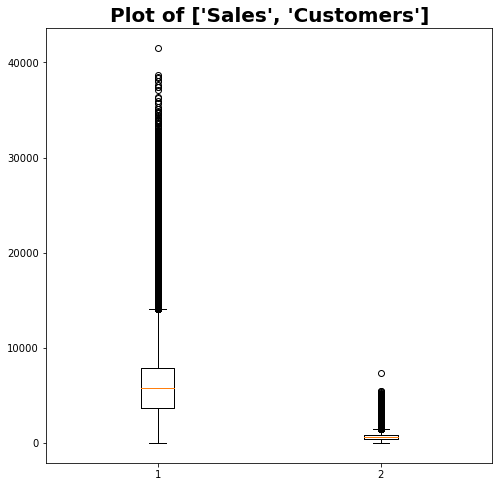

In [ ]:
#to show that the sales and customers featues has outlines 
DV.plot_box2(train_store, ['Sales', 'Customers'])

In [ ]:
#filling the outliners using mean
train_store_cleaned = DC.fill_outliers(train_store, ['Sales' , 'Customers'])

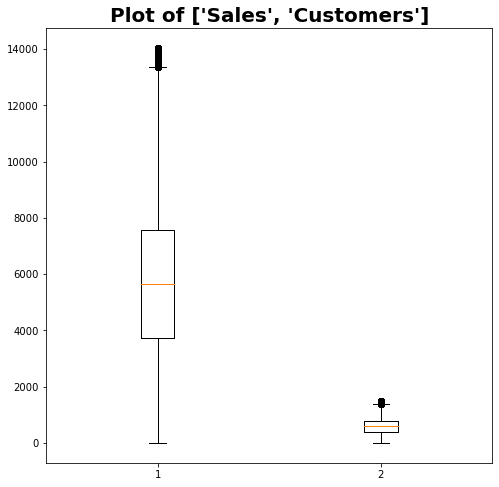

In [ ]:
#checking for outliners again
DV.plot_box2(train_store_cleaned, ['Sales', 'Customers'])

In [ ]:
#pipline to handle missing values and outliers
pipe = Pipeline(steps=[ ("Handle numerical missing values", FunctionTransformer(DC.fill_missing_by_median)),
                        ("Handle categorical missing values", FunctionTransformer(DC.fill_missing_by_mode)),
                        ("Handle outlier", FunctionTransformer(DC.fill_outliers, kw_args={'cols':['Sales', 'Customers']}))])

In [ ]:
# Fixing the outliers using the pipe line created

# train_clean = pipe.fit_transform(train_store)

In [ ]:
DV.summ_columns(train_store_cleaned)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Store,0,0.0,int64,1115
1,DayOfWeek,0,0.0,int64,7
2,Date,0,0.0,object,942
3,Sales,0,0.0,float64,13194
4,Customers,0,0.0,float64,1423
5,Open,0,0.0,int64,2
6,Promo,0,0.0,int64,2
7,StateHoliday,0,0.0,object,5
8,SchoolHoliday,0,0.0,int64,2
9,StoreType,0,0.0,object,4


Fixed the outliners

In [ ]:
# saving clean data to new files
train_store_cleaned.to_csv('../data/train_store.csv', index= False)
test_store_cleaned.to_csv('../data/test_store.csv', index= False)
